# Opis ćwiczenia
## Regresja liniowa
Wzorując się na przykładzie:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
1. Zbuduj model regresji liniowej dla danych, dla których robiłeś EDA. Wybierz jedną z cech (kolumn) o wartościach rzeczywistych i zbuduj model regresji między tą cechą a wartością wyjściową (jeśli zbior dotyczy regresji) lub między dwiema cechami wejściowymi jeśli to przykład klasyfikacji przy domyślnych wartościach hiperparametrów modelu. (10 pkt)
2. Określ jaki jest błąd (score) 5 pkt
3. Zbuduj wykres punktowy (15 pkt):
- Wykreśl dane uczące w kolorze czarnym
- Wykreśl testowe w kolorze czerwonym
- krzywą regresji w kolorze niebieskim (predykowane wartości).
    
RAZEM 30 pkt

## 1. Przygotowanie bibliotek i wczytanie danych

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# 1. a) Wczytanie danych

df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# 1. b) Zbiór danych był przygotowany pod klasyfikację, 
#    więc jako parametr wyjściowy została wybrana jedna z cech wejściowych

variable = "fixed acidity"
output = "pH"

X = df[[variable]]
y = df[output]

X.shape, y.shape

((1599, 1), (1599,))

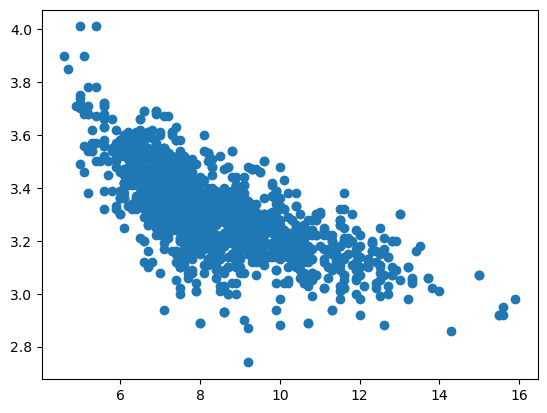

In [4]:
# Wykres związku wybranych wartości

plt.scatter(X, y)
plt.show()

In [5]:
# 1. c) Określenie części uczącej oraz testowej

test_size = 200
# X_train = X[:-test_size]
# X_test = X[-test_size:]

# y_train = y[:-test_size]
# y_test = y[-test_size:]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=test_size, random_state=0)

In [6]:
# 1. d) Uczenie modelu regresji liniowej

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

## 2. Predykcja

In [7]:
# 2. Predykcja oraz jej błąd

y_pred = regr.predict(X_test)

print(f"Score: {regr.score(X, y)}")
print(f"Coefficient: {regr.coef_}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
print(f"Intercept (bias): {regr.intercept_}")

Score: 0.4664564619656031
Coefficient: [-0.06064544]
Mean squared error: 0.013009504919397563
Coefficient of determination: 0.47535443477884953
Intercept (bias): 3.8154515876312396


## 3. Wykres

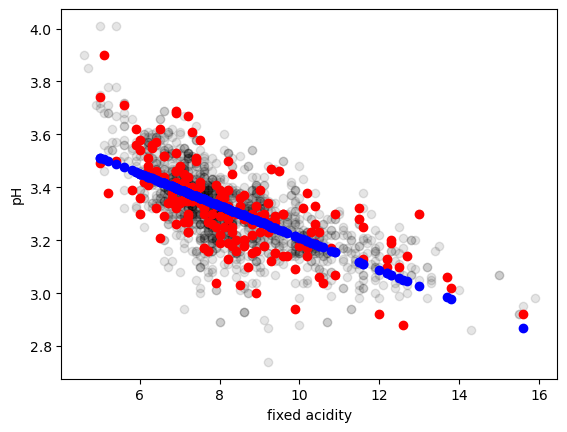

In [8]:
# 3. Wykres

plt.scatter(X_train, y_train, color="black", alpha=0.1)
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, y_pred, color="blue")

plt.xlabel(variable)
plt.ylabel(output)
# plt.axis([0, 10, None, None])

plt.show()